我们使用这个代码 https://github.com/watsonyanghx/CNN_LSTM_CTC_Tensorflow
数据地址：
traindata:http://baidudeeplearning.bj.bcebos.com/image_contest_level_1.tar.gz
约973M
testdata:http://baidudeeplearning.bj.bcebos.com/image_contest_level_1_validate.tar.gz
约1.9G
训练图像10万张有标签
测试图像20万张无标签

In [6]:
train_data_path='/home/tianliang/datasets/ocr/image_contest_level_1/'
test_data_path='/home/tianliang/datasets/ocr/image_contest_level_1_validate/'
train_label_path='/home/tianliang/datasets/ocr/image_contest_level_1/labels.txt'

In [58]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
import cv2
from PIL import Image
%matplotlib inline

先对数据做分析

In [10]:
print("total files in train dataset:",len(os.listdir(train_data_path)))
print("total files in train dataset:",len(os.listdir(test_data_path)))

total files in train dataset: 100001
total files in train dataset: 200000


In [23]:
train_images=sorted(glob.glob(train_data_path+'*.png'),key=lambda x:int(x.split('/')[-1].split('.')[0]))
test_images=sorted(glob.glob(test_data_path+'*.png'),key=lambda x:int(x.split('/')[-1].split('.')[0]))
print(train_images[:9])
print(test_images[:9])

['/home/tianliang/datasets/ocr/image_contest_level_1/0.png', '/home/tianliang/datasets/ocr/image_contest_level_1/1.png', '/home/tianliang/datasets/ocr/image_contest_level_1/2.png', '/home/tianliang/datasets/ocr/image_contest_level_1/3.png', '/home/tianliang/datasets/ocr/image_contest_level_1/4.png', '/home/tianliang/datasets/ocr/image_contest_level_1/5.png', '/home/tianliang/datasets/ocr/image_contest_level_1/6.png', '/home/tianliang/datasets/ocr/image_contest_level_1/7.png', '/home/tianliang/datasets/ocr/image_contest_level_1/8.png']
['/home/tianliang/datasets/ocr/image_contest_level_1_validate/0.png', '/home/tianliang/datasets/ocr/image_contest_level_1_validate/1.png', '/home/tianliang/datasets/ocr/image_contest_level_1_validate/2.png', '/home/tianliang/datasets/ocr/image_contest_level_1_validate/3.png', '/home/tianliang/datasets/ocr/image_contest_level_1_validate/4.png', '/home/tianliang/datasets/ocr/image_contest_level_1_validate/5.png', '/home/tianliang/datasets/ocr/image_contest_

In [31]:
with open(train_label_path,'r') as f:
    train_labels=f.read().strip().split('\n')
print(len(train_labels))
print(train_labels[:9])

100000
['(4*8)+8 40', '7+3*0 7', '5+(5+2) 12', '(8-0)-8 0', '0+(0+2) 2', '(2*5)+0 10', '0+(1+8) 9', '2+(4+9) 15', '7*2+4 18']


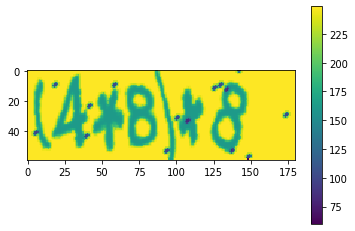

(60, 180)


In [82]:
plt.figure()
im=cv2.imread(train_images[0],cv2.IMREAD_GRAYSCALE)
plt.imshow(im)
plt.colorbar()
plt.grid(False)
plt.show()
print(im.shape)

In [84]:
im=cv2.imread(train_images[0])
print("the image shape is :",im.shape)


the image shape is : (60, 180, 3)


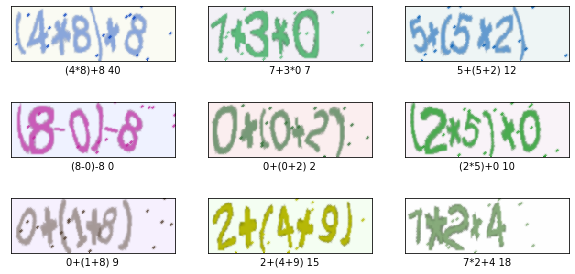

In [78]:
plt.figure(figsize=(10,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    im=Image.open(train_images[i])
    plt.imshow(im)
    plt.xlabel(train_labels[i])
plt.show()